<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [122]:
# Isi dengan data diri Anda
NAMA = "Fransisco William Sudianto"
KELAS = "D"
NPM = "2006596535"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = [
    'https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html',
    'https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1',
    'https://stackabuse.com/bytes/agglomerative-hierarchical-clustering-with-scikit-learn/',
    'https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b'
]

In [123]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fransisco William Sudianto dari kelas D dengan NPM 2006596535, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fransisco William Sudianto)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [124]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [125]:
df = pd.read_csv('penguin.csv')
df.head()

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [127]:
df.head().describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,4.000000,4.00000,4.000000,4.000000
mean,38.900000,18.35000,188.750000,3562.500000
std,1.549193,0.82664,6.448514,259.406374
min,36.700000,17.40000,181.000000,3250.000000
25%,38.500000,17.85000,184.750000,3400.000000
50%,39.300000,18.35000,189.500000,3600.000000
75%,39.700000,18.85000,193.500000,3762.500000
max,40.300000,19.30000,195.000000,3800.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [128]:
print("Jumlah data yang memiliki missing value setiap baris")
print(df.isnull().sum())
print("Shape data")
print(df.shape)
# karena jumlah data yang missing sedikit dibandingkan dengan jumlah row, saya manangani missing value dengan cara drop row yang memiliki missing value
df2 = df.dropna()

Jumlah data yang memiliki missing value setiap baris
pulau_habitat          0
panjang_paruh_atas     2
tebal_paruh_atas       2
panjang_sirip          2
massa_tubuh            2
jenis_kelamin         10
dtype: int64
Shape data
(344, 6)


5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

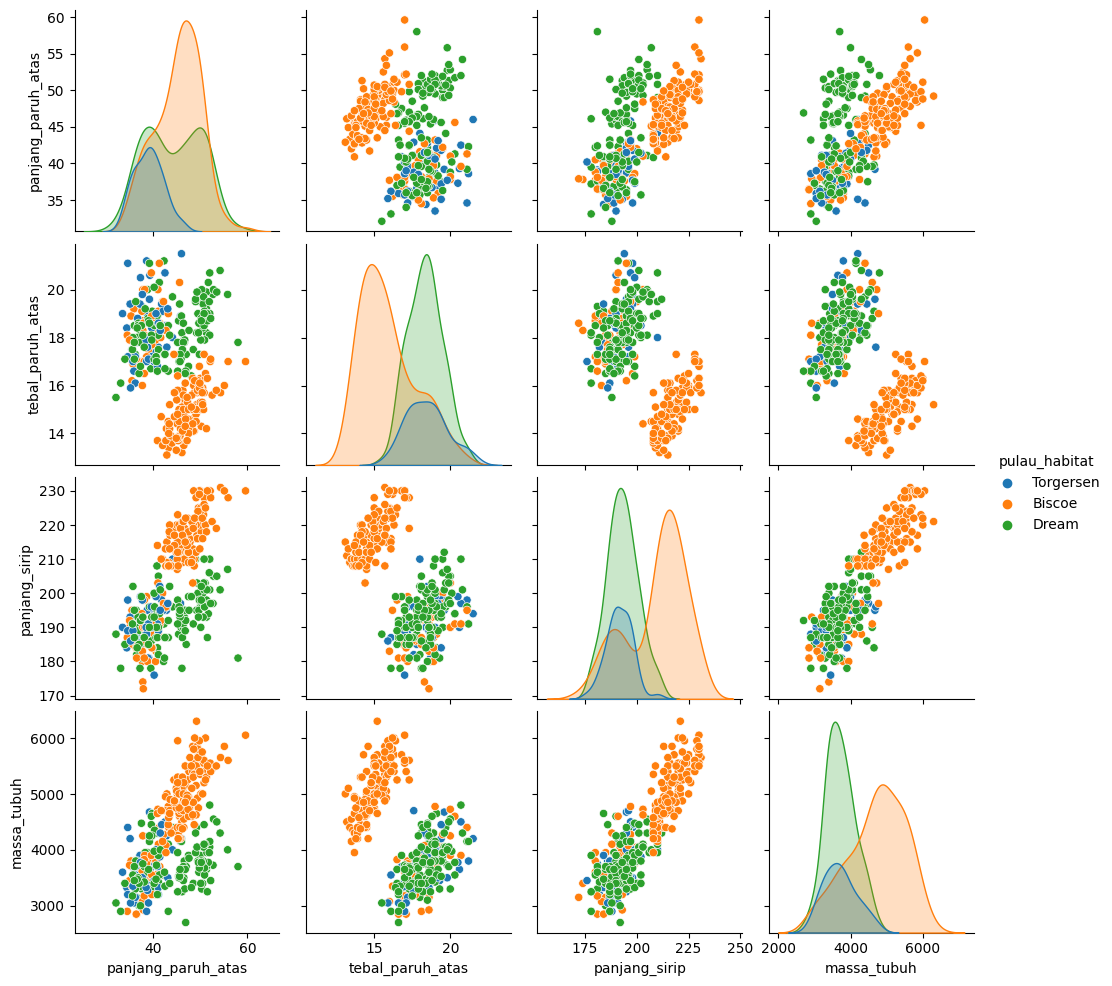

In [129]:
sns.pairplot(df2, hue='pulau_habitat')

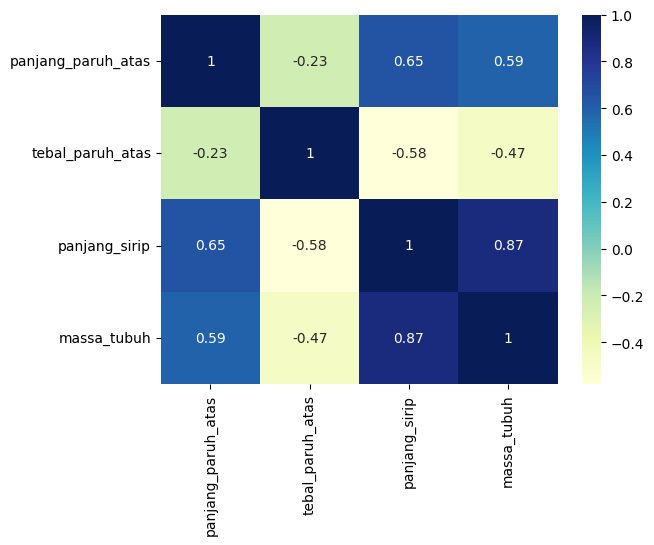

In [130]:
dataplot = sns.heatmap(df2.corr(method="pearson"), cmap="YlGnBu", annot=True)
plt.show()

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

Berdasarkan heatmap yang telah dibuat, terlihat korelasi antara panjang sirip dan massa tubuh cukup tinggi yaitu 0.87, artinya kedua data memiliki hubungan yang dekat dan hal tersebut mengindikasikan
bahwa salah satu data cukup untuk menentukan perkiraan nilai dari data lainnya. Hal tersebut tidak tepat apabila dipakai sebagai attribute untuk diproses dalam clustering karena akan menghasilkan
cluster yang kurang bermakna. Oleh karena itu, saya memilih pasangan attribute yang memiliki korelasi terrendah, yaitu tebal paruh atas dan panjang sirip, dimana nilai korelasinya -0.58 yang artinya
kedua data memiliki sifat yang berbeda sehingga cocok untuk dianalisis dan diproses menggunakan clustering. 

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [131]:
from sklearn import preprocessing
df3 = df2[['tebal_paruh_atas', 'panjang_sirip']]
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(df3)
for num_clusters in range (2,7):
    
    # Initialize the clusterer with n_clusters value.
    clusterer = KMeans(n_clusters=num_clusters)
    cluster_labels = clusterer.fit_predict(scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print(
        "For n_clusters =",
        num_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


For n_clusters = 2 The average silhouette_score is : 0.6412203674266869
For n_clusters = 3 The average silhouette_score is : 0.501655506890765
For n_clusters = 4 The average silhouette_score is : 0.436018897701361
For n_clusters = 5 The average silhouette_score is : 0.3886760410207042
For n_clusters = 6 The average silhouette_score is : 0.4009720154453262


berdasarkan hasil perhitungan, nilai K yang optimal adalah K = 2 karena memiliki silhouette score yang paling tinggi, artinya kita akan membuat 2 cluster

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [132]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(scaled)
Kmean.cluster_centers_

array([[ 0.6158298 , -0.64954647],
       [-1.09822981,  1.15835787]])

9. Visualisasikan klaster yang ada [5]

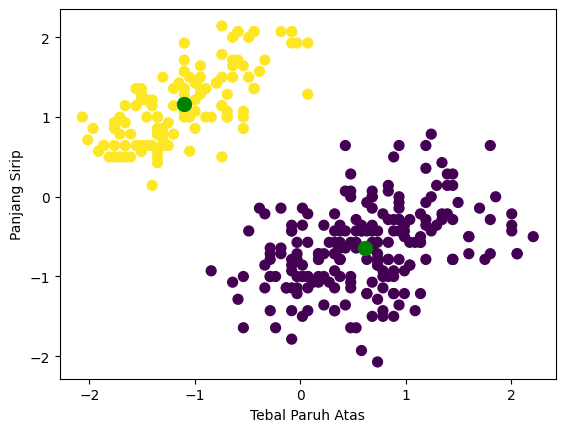

In [133]:
plt.scatter(scaled[ : , 0], scaled[ : , 1], s =50, c=Kmean.labels_.astype(float))
plt.scatter(Kmean.cluster_centers_[:,0], Kmean.cluster_centers_[:,1], s=100, c='g')
plt.xlabel('Tebal Paruh Atas')
plt.ylabel('Panjang Sirip')
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]

Berdasarkan hasil visualisasi klaster yang dilakukan, terlihat bahwa terdapat 2 kluster yang cukup berbeda, yaitu kluster pertama
(warna ungu) dan kluster kedua (warna kuning). kluster pertama mengelompokkan attribute panjang_sirip yang memiliki nilai besar dan 
memiliki tebal_paruh_atas dengan nilai kecil, sedangkan kluster kedua mengelompokkan attribute panjang_sirip yang memiliki nilai
kecil dan attribute tebal_paruh_atas yang memiliki nilai besar. Setiap kluster memiliki centroid yang berada di tengah-tengah kluster 
(warna hijau) yang bernilai rata-rata dari setiap nilai yang ada di dalam kluster tersebut. 

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


Text(0.5, 1.0, 'Without choosing number of clusters')

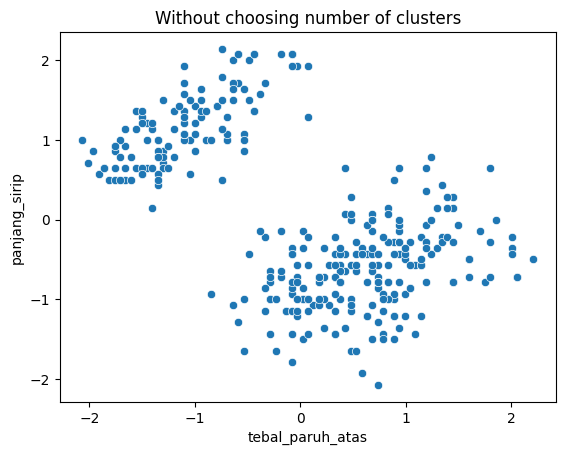

In [134]:
df_scaled = pd.DataFrame(scaled, columns=['tebal_paruh_atas', 'panjang_sirip'])
clustering_1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(df_scaled)
sns.scatterplot(data=df_scaled, x='tebal_paruh_atas', y='panjang_sirip').set_title("Without choosing number of clusters")

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

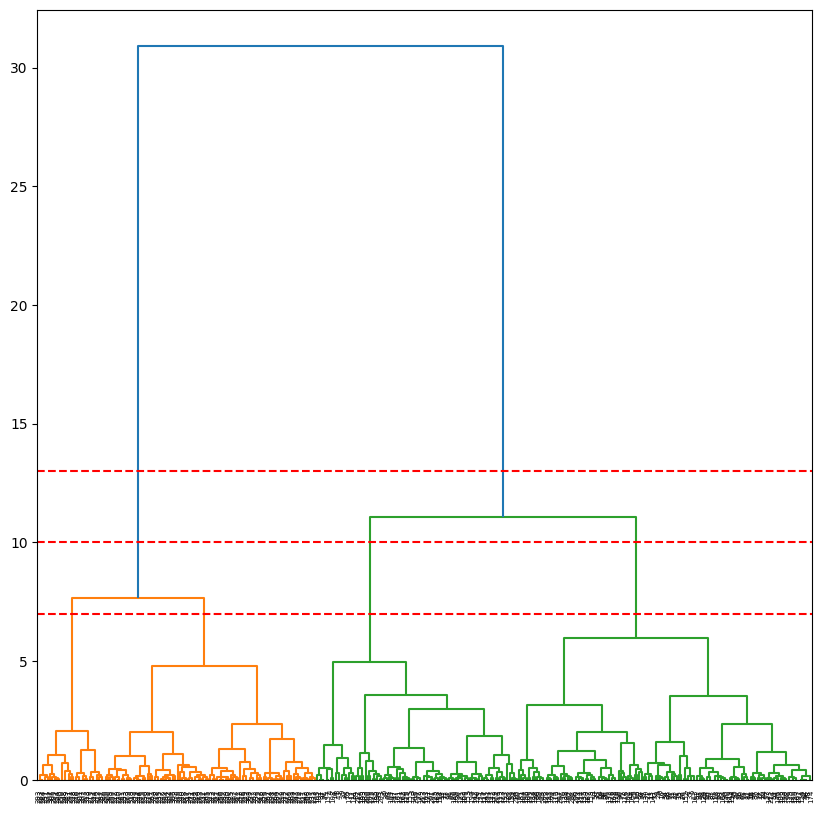

In [135]:
cluster_1 = shc.linkage(df_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10,10))
dendogram_1 = shc.dendrogram(cluster_1)
plt.axhline(13, color='red', linestyle='--')
plt.axhline(10, color='red', linestyle='--')
plt.axhline(7, color='red', linestyle='--')
plt.show()

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

Text(0.5, 1.0, 'With n_clusters = 2')

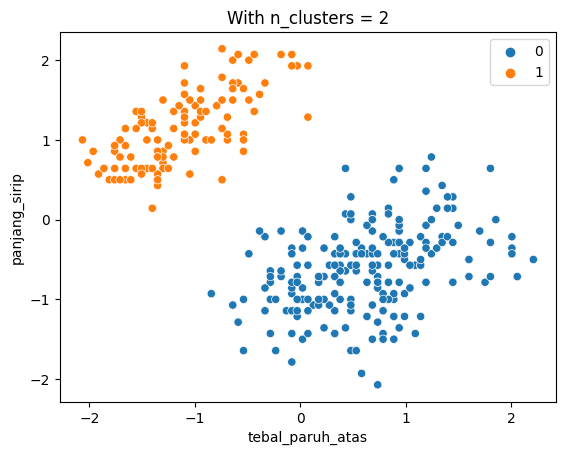

In [137]:
clustering_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering_2.fit(df_scaled)
sns.scatterplot(data=df_scaled, x='tebal_paruh_atas', y='panjang_sirip', hue=clustering_2.labels_).set_title("With n_clusters = 2")

14. Visualisasikan hasil *clustering assignment* [4]

Text(0.5, 1.0, 'With 2 clusters')

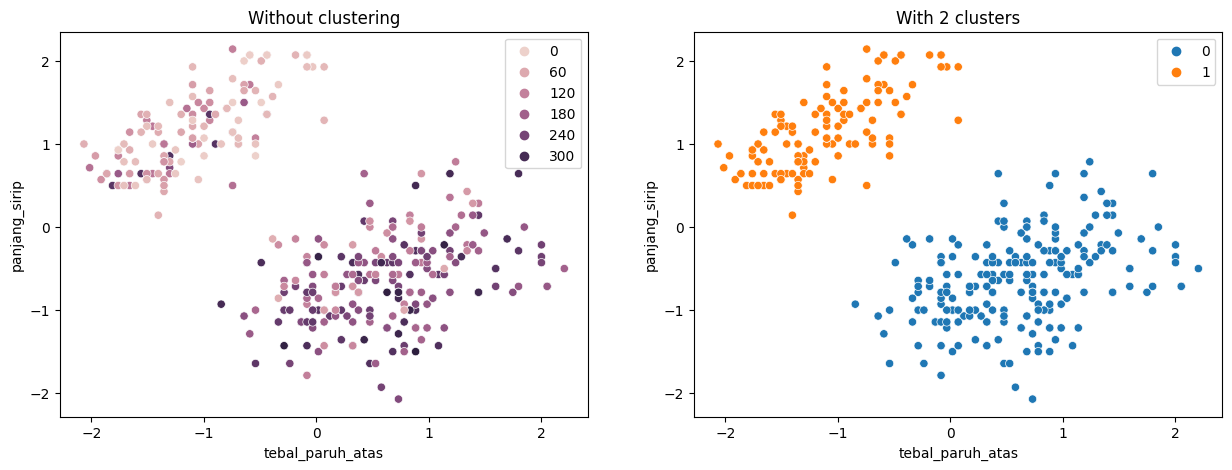

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_scaled, x='tebal_paruh_atas', y='panjang_sirip', hue=clustering_1.labels_).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_scaled, x='tebal_paruh_atas', y='panjang_sirip', hue=clustering_2.labels_).set_title('With 2 clusters')

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

15. Terdapat beberapa pendekatan ketika kita berhadapan dengan data yang bertipe categorical dan numerical pada saat ingin melakukan clustering. Pertama, kita bisa mengubah data categorical menjadi numerical seperti apabila data categorical tersebut nilainya antara yes atau no, kita bisa ubah yes menjadi 1 dan no menjadi 0. Untuk itu, kita bisa menggunakan Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP) dan Factorial Analysis of Mixed Data (FAMD) untuk mereduksi dimensi dan mengubah data-data categorical menjadi numerical. Kita juga bisa mengassign setiap data categorical ke numerical secara manual untuk kasus-kasus tertentu. Cara lainnya untuk menangani data categorical adalah dengan tidak mengikutsertakannya dalam proses clustering. 

16. K-Means clustering kurang cocok untuk dataset yang bentuknya tidak globural karena algoritma K-Means akan membuat data-data yang tidak diinginkan atau secara kasat mata berada pada cluster lain tertarik oleh centroid sehingga menghilangkan cluster yang sudah terlihat polanya tetapi bukan globural. Centroid akan menarik data-data yang memiliki jarak terdekat, walaupun data tersebut sebenarnya ada dalam cluster lain. Dengan penentuan centroid yang berulang-ulang, maka hasil analisis data akan menjadi kurang tepat.

17. Tidak, karena setiap kali dijalankan, algoritma K-Means akan membuat centroid yang bersifat random atau acak, meskipun dengan batas-batas tertentu, tetapi centroid tersebut tetap akan menghitung jarak antara centroid dengan data-data di sekitarnya sehingga ada kemungkinan data yang dihasilkan setiap dijalankan berbeda. 

18. Intra-cluster similarity dihitung dengan menghitung jarak antara setiap data dalam cluster dengan centroid dalam cluster tersebut, sedangkan inter-cluster similarity dihitung dengan menghitung jarak antara data dalam suatu cluster dengan cluster lainnya. Inter-cluster similarity mengindikasikan seberapa baik kedua data terpisah, sedangkan intra-cluster similarity adalah kebalikannya, yaitu seberapa baik kedua data berdekatan. Suatu klaster dianggap baik apabila nilai intra-cluster similaritynya kecil, artinya data saling berbedakatan, dan nilai inter-cluster similaritynya tinggi, artinya data saling terpisah sehingga kluster-kluster yang terbentuk cukup jelas dan mengelompokkan data-data yang sejenis.